In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from datetime import datetime
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
import pytz
from pandas.tseries.offsets import Hour
from pandas.tseries.frequencies import to_offset
## test for stationarity
from statsmodels.tsa.stattools import adfuller

In [2]:
def checkADF(data):
    for col in data.columns:
        y = adfuller(data[col])
        print(col)
        output = pd.Series(y[0:4], ["Test stat", "pval", "usedlags", "NOBS"])
        print(output)
        
    
    



In [3]:
def visualize(data, bus, save):
    ##visualization by day of the year
    dates = pd.PeriodIndex(year=data.Year, month = data.Month ,day = data.Day, freq = "D")
    data['Date'] = dates
    new_data = data.groupby('Date').mean()
    fig1 = plt.figure()
    fig1.set_figwidth(15)
    new_data[bus].plot()
    
    if save == True:
        fig1.savefig('DayMeanWind')

In [4]:
def visualize_day(data, bus, freq, x, save):
    ##visualizes the x first days  and the x last days for the data frame data, bus bus, and of frequency of data collection freq.
    period  = data.Period*freq 
    dates = pd.PeriodIndex(year=data.Year, month = data.Month,day = data.Day, minute = period, freq = "T")
    
    data['Date'] = dates
    new_data  = data.groupby('Date').sum()
    
    fig1 = plt.figure()
    fig1.set_figwidth (20)
    image_first_21 = new_data[bus].plot()
    image_first_21 = fig1.add_subplot(image_first_21)
    
    if save == True:
        fig1.savefig('Wind')
    
    
    
    fig2 = plt.figure()
    fig2.set_figwidth (50)
    image_first_21 = new_data[bus].head(x).plot()
    image_first_21 = fig2.add_subplot(image_first_21)

    if save == True:
        fig2.savefig('Wind_first_couple')
    
    fig3 = plt.figure()
    fig3.set_figwidth (50)
    image_last_21 = new_data[bus].tail(x).plot()
    image_last_21 = fig3.add_subplot(image_last_21)
    
    if save == True:
        fig3.savefig('Wind_last_couple')
        
    new_data = new_data.drop(['Year',"Month", 'Day', 'Period'],axis='columns')
    
    return new_data


In [5]:
def multidata_FT(model, df1):
    
    c = 0
    
    for col in df1.columns:
        if c==0:
            data = model.fit(df = df1[col].squeeze().to_timestamp()).resid.to_frame()
            c = 1
        else:
            series = model.fit(df = df1.to_timestamp()[col]).resid
            data[col] = series.values
            
    
    return data
        

In [10]:

wind = pd.read_csv('REAL_TIME_Wind.csv')


wind_des = pd.read_csv('Wind_deseason_15.csv', parse_dates=[0], index_col=0)

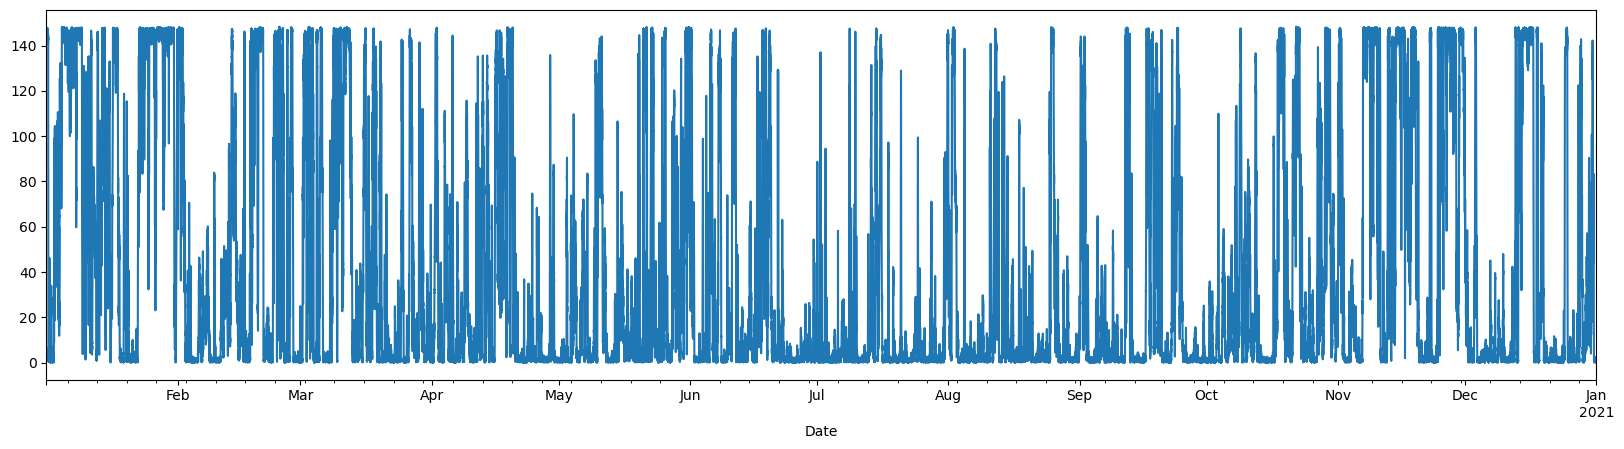

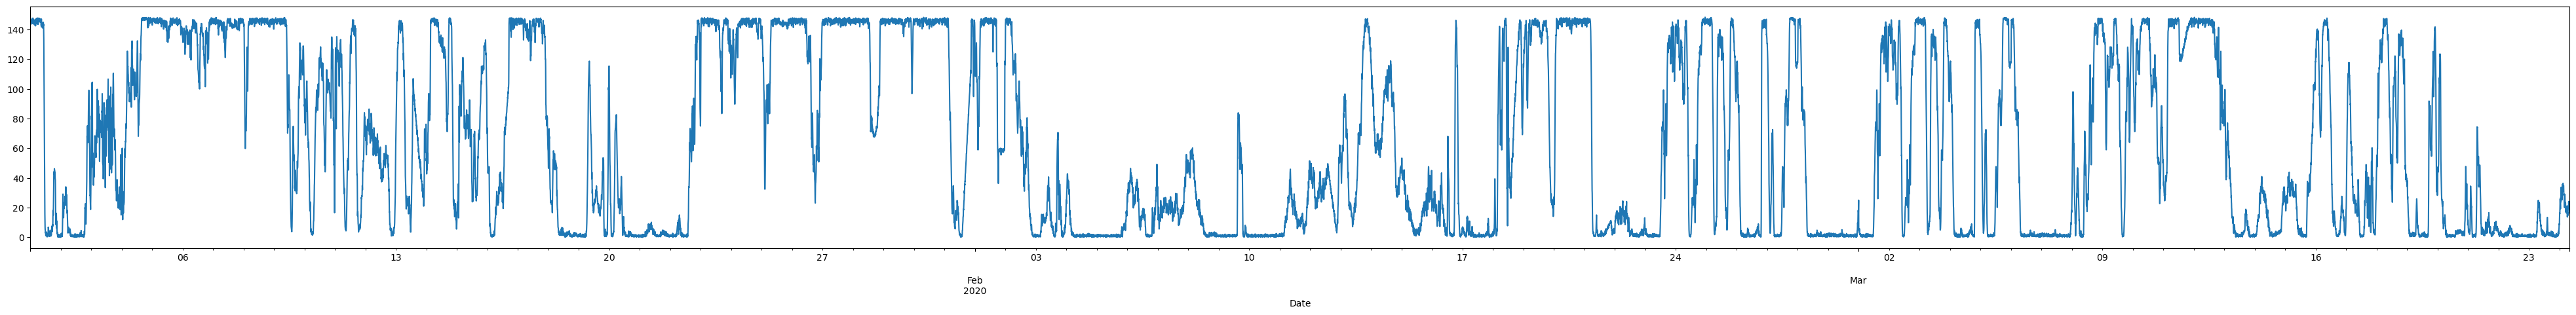

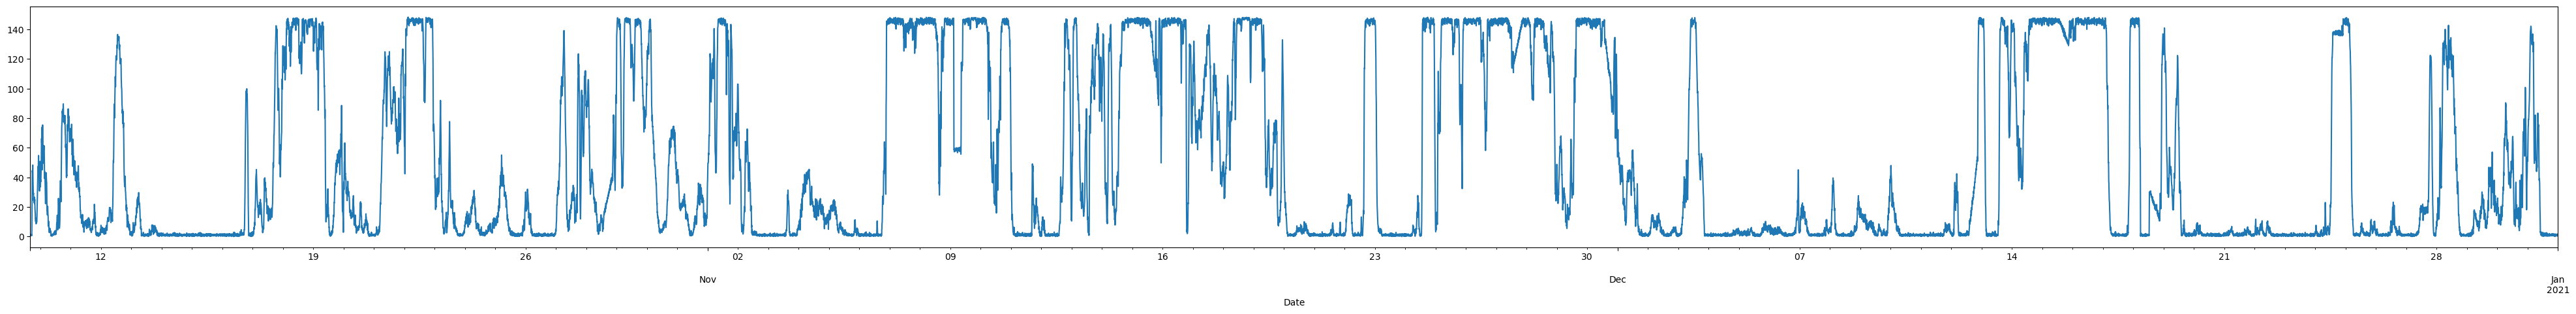

In [11]:
##visualization by every 5 minutes

new_wind = visualize_day(wind, '309_WIND_1',5, 24000, False)



In [12]:
checkADF(new_wind)



##all 4 have pvalue less than 0.05 so we don't have to worry about unit roots.

309_WIND_1
Test stat   -1.584160e+01
pval         9.678023e-29
usedlags     6.700000e+01
NOBS         1.053400e+05
dtype: float64
317_WIND_1
Test stat   -1.530310e+01
pval         4.286028e-28
usedlags     6.100000e+01
NOBS         1.053460e+05
dtype: float64
303_WIND_1
Test stat   -1.577249e+01
pval         1.156533e-28
usedlags     6.900000e+01
NOBS         1.053380e+05
dtype: float64
122_WIND_1
Test stat   -1.435754e+01
pval         9.975388e-27
usedlags     6.100000e+01
NOBS         1.053460e+05
dtype: float64


In [14]:

checkADF(wind_des)
#print(wind_des.drop(['Year',"Month", 'Day', 'Period'],axis='columns'))


309_WIND_1
Test stat   -1.669975e+01
pval         1.464654e-29
usedlags     2.500000e+01
NOBS         3.511000e+04
dtype: float64
317_WIND_1
Test stat   -1.637918e+01
pval         2.762180e-29
usedlags     2.800000e+01
NOBS         3.510700e+04
dtype: float64
303_WIND_1
Test stat   -1.762175e+01
pval         3.835615e-30
usedlags     1.900000e+01
NOBS         3.511600e+04
dtype: float64
122_WIND_1
Test stat   -1.723837e+01
pval         6.129635e-30
usedlags     1.300000e+01
NOBS         3.512200e+04
dtype: float64
